In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from sqlalchemy import create_engine, MetaData
from sqlalchemy.orm import sessionmaker
from sqlalchemy import Table
from sqlalchemy import Column, BIGINT, Index
from sqlalchemy.orm import mapper
from sqlalchemy.ext.declarative import declarative_base
from razi import rdkit_postgresql
from razi.rdkit_postgresql.types import Mol
from razi.rdkit_postgresql.types import Bfp
db = create_engine('postgres://iwatobipen@localhost:5432/chembl_27',
                   #echo=True
                  )
metadata = MetaData(schema='rdk')
Base = declarative_base()

In [2]:
class Mols(Base):
    __table__ = Table('mols',
                      metadata,
                      Column('molregno', BIGINT, primary_key=True),
                      Column('m', Mol),
                      extend_existing=True,
                      )
class Fps(Base):
    __table__ = Table('fps',
                     metadata,
                     Column('molregno', BIGINT, primary_key=True),
                     Column('torsionbv', Bfp),
                     Column('mfp2', Bfp),
                     Column('ffp2', Bfp),
                     extend_existing=True)

In [3]:
Session = sessionmaker(bind=db)
session = Session()

In [4]:
cpds = session.query(Mols)

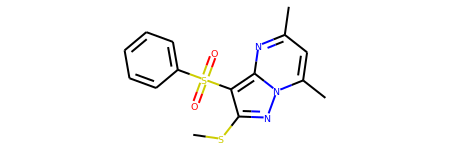

1067214


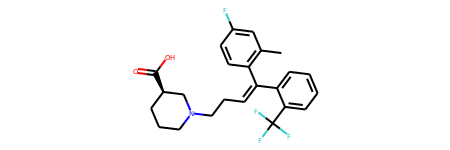

1056811


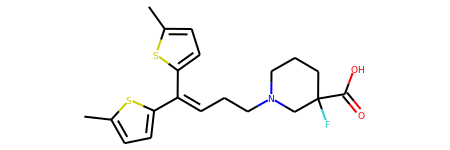

1056812


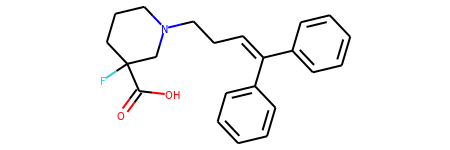

1056813


In [5]:
from IPython.display import display
for row in cpds[:4]:
    display(row.m)
    print(row.molregno)

In [6]:
cpds = session.query(Mols)
cpds = cpds.filter(Mols.m.hassubstruct('n1cccc2ccccc12'))

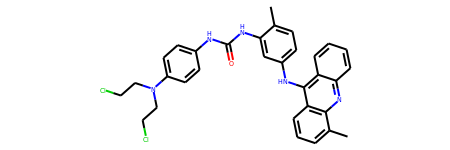

486477


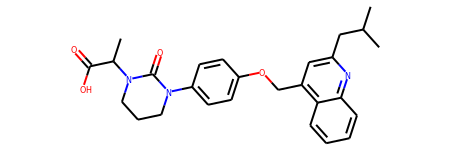

479949


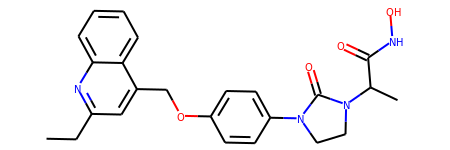

480014


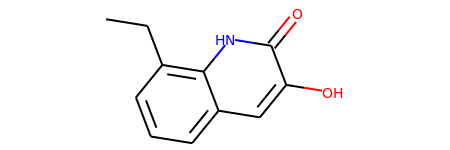

479022


In [7]:
for row in cpds[:4]:
    display(row.m)
    print(row.molregno)

In [8]:
from razi.rdkit_postgresql.functions import mol_amw
cpds = session.query(Mols)
cpds = cpds.filter(Mols.m.hassubstruct('n1cccc2ccccc12')).filter(mol_amw(Mols.m) <= 200)

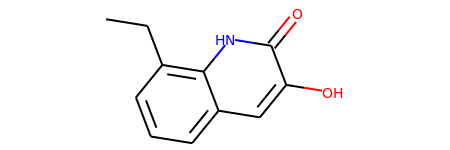

479022


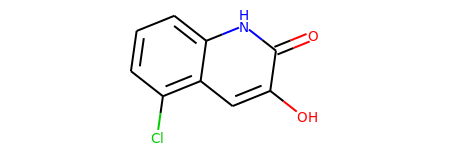

478941


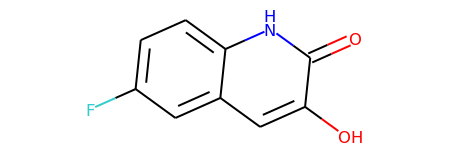

478936


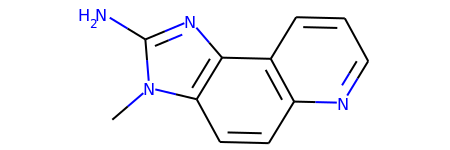

695399


In [9]:
for row in cpds[:4]:
    display(row.m)
    print(row.molregno)

In [10]:
session.execute('set rdkit.tanimoto_threshold=0.7')
fps = session.query(Fps)

In [11]:
from razi.rdkit_postgresql.functions import featmorganbv_fp

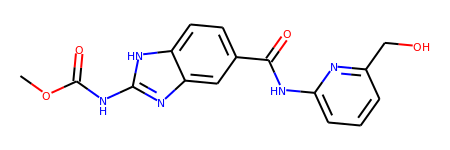

In [12]:
smiles = 'COC(=O)Nc1nc2cc(C(=O)Nc3cccc(CO)n3)ccc2[nH]1'
mol = Chem.MolFromSmiles(smiles)
fp = featmorganbv_fp(smiles)
mol

In [13]:
fp

<razi.rdkit_postgresql.functions.featmorganbv_fp at 0x7fced16b6650; featmorganbv_fp>

In [14]:
res = fps.filter(Fps.ffp2.tanimoto_sml(fp))

In [15]:
res.count()

4

In [16]:
regno = []
for row in res:
    print(row.molregno)
    regno.append(row.molregno)

9272
9260
9352
9353


In [17]:
cpds = session.query(Mols)

In [18]:
cpds = cpds.filter(Mols.molregno.in_(regno))

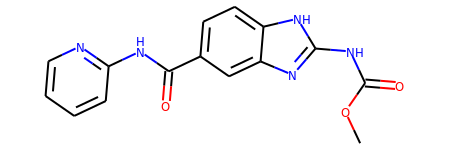

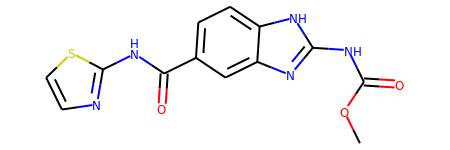

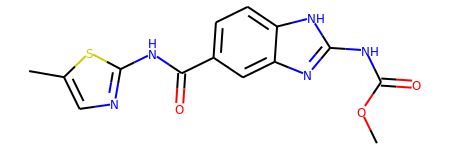

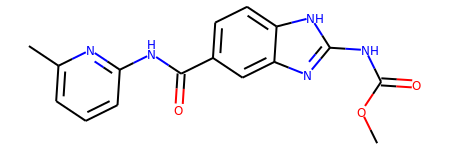

In [19]:
for cpd in cpds[:10]:
    display(cpd.m)